In [61]:
import numpy as np
from functools import reduce
from timeit import default_timer as timer
from datetime import timedelta
from tqdm import tqdm

iters = 5
n = 2000
v = np.arange(1, n, dtype=int)
rand_vectors = list(map(lambda n: np.random.rand(1,n), v))

I. Generate an n-dimensional random vector 𝒗 = [𝑣%, 𝑣',…, 𝑣)] with non-negative
elements. For 𝒗, implement the following calculations and algorithms:
1) 𝑓(𝒗) = 𝑐𝑜𝑛𝑠𝑡 (constant function);
2) 𝑓(𝒗) = Σ 𝑣
3) 𝑓(𝒗) = Π 𝑣
4) supposing that the elements of 𝒗 are the coefficients of a polynomial 𝑃 of
degree 𝑛 − 1, calculate the value 𝑃(1.5) by a direct calculation of 𝑃(𝑥) =
Σ 𝑣4𝑥4=% )4
5% (i.e. evaluating each term one by one) and by Horner’s method
by representing the polynomial as
𝑃(𝑥) = 𝑣% + 𝑥?𝑣' + 𝑥(𝑣@ + ⋯)B;
5) Bubble Sort of the elements of 𝒗;
6) Quick Sort of the elements of 𝒗;
7) Timsort of the elements of 𝒗.


In [62]:
def constantFun(arr):
    return arr[0]

def linearSum(arr):
    return reduce(lambda x,y: x+y, arr)

def linearProduct(arr): 
    return reduce(lambda x,y: x*y, arr)

def polynom(arr, x = 1.5):
    sum = 0
    for index, item in enumerate(arr):
        sum += item * (x ** (index - 1))
    return sum

def hornerPolynom(arr, x = 1.5): 
    result = arr[len(arr) - 1] 
  
    # Evaluate value of polynomial
    # using Horner's method
    for i in range(1, len(arr) - 1)[::-1]:
 
        result = result*x + arr[i]
  
    return result
                  
def bubbleSort(arr):
    n = len(arr)
    # optimize code, so if the array is already sorted, it doesn't need
    # to go through the entire process
    swapped = False
    # Traverse through all array elements
    for i in range(n-1):
        # range(n) also work but outer loop will
        # repeat one time more than needed.
        # Last i elements are already in place
        for j in range(0, n-i-1):
 
            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            if arr[j] > arr[j + 1]:
                swapped = True
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
         
        if not swapped:
            # if we haven't needed to make a single swap, we
            # can just exit the main loop.
            return
def quickSort(array):
    # Create a local copy of array.
    arr = array

    def sort(start, end):
        # Base case condition
        if not start < end:
            return

        # Make it known to the inner function that we will work on arr
        # from the outer definition
        nonlocal arr

        i = start + 1
        j = start + 1

        # Choosing the pivot as the first element of the working part
        # part of arr
        pivot = arr[start]

        # Start partitioning
        while j <= end:
            if arr[j] < pivot:
                temp = arr[i]
                arr[i] = arr[j]
                arr[j] = temp
                i += 1
            j += 1
        temp = arr[start]
        arr[start] = arr[i - 1]
        arr[i - 1] = temp
        # End partitioning

        # Finally recurse on both partitions
        sort(start + 0, i - 2)
        sort(i, end)
    sort(0, len(array) - 1)
def timSort(arr):
    return arr.sort()
testFunctions = [(constantFun, 0), (linearSum, 1), (linearProduct, 1), (polynom, 2), (hornerPolynom, 2), (bubbleSort, 2), (quickSort, 2), (timSort, 1)]


In [63]:
def tester(testFunctions, testData, iters=5):
    testedData = {}
    dataForFunction = []
    for fun, deg in testFunctions:
        dataForFunction = []
        iterator = enumerate(testData)
        if fun.__name__ == 'bubbleSort' or fun.__name__ == 'polynom' or fun.__name__ == 'hornerPolynom':
            iterator = enumerate(testData[0:1000])
        for index, vect in tqdm(iterator):
            start = timer()

            
            for run in range(0, iters):
                res = fun(np.array(vect[0]))

            end = timer()
            time = end-start
            dataForFunction.append((index, time))
        testedData[fun.__name__] = dataForFunction
    return testedData
    

1999it [00:00, 166562.31it/s]
1999it [00:01, 1924.76it/s]
1999it [00:01, 1975.02it/s]
1000it [00:00, 1394.40it/s]
1000it [00:00, 1814.86it/s]
1000it [03:42,  4.49it/s]
1999it [00:30, 64.90it/s] 
1999it [00:00, 6985.44it/s] 


0


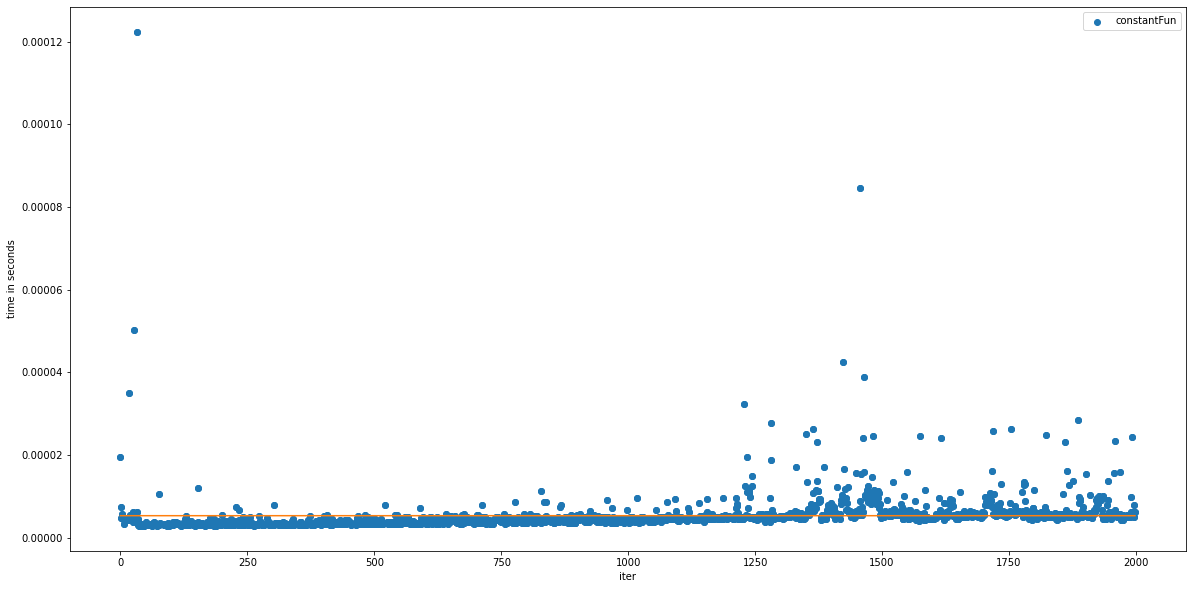

constantFun
1


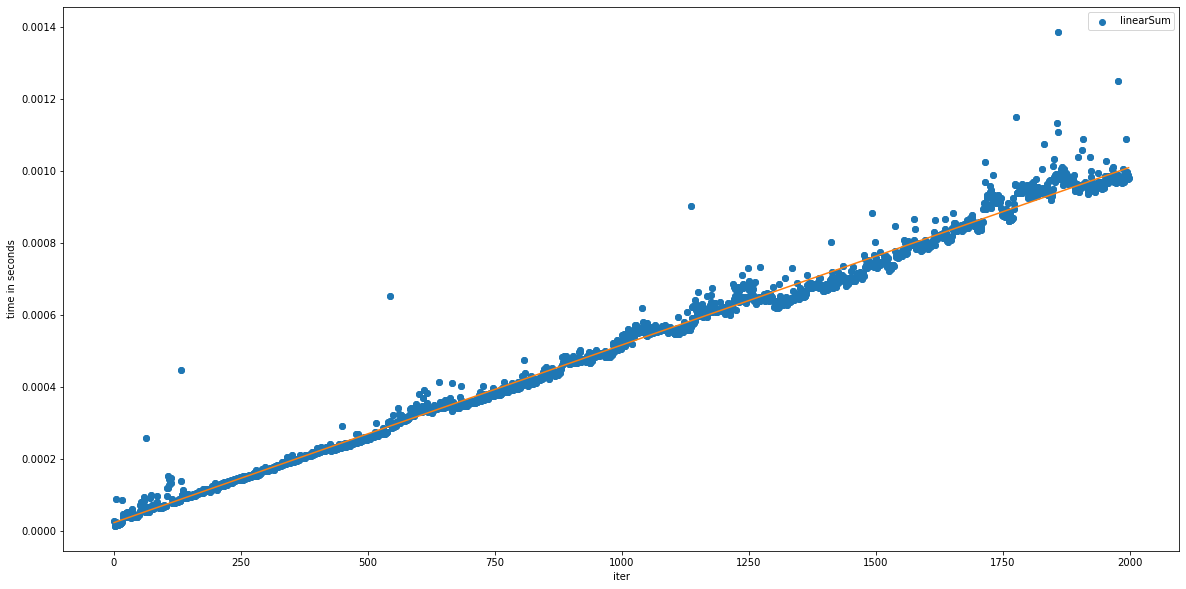

linearSum
1


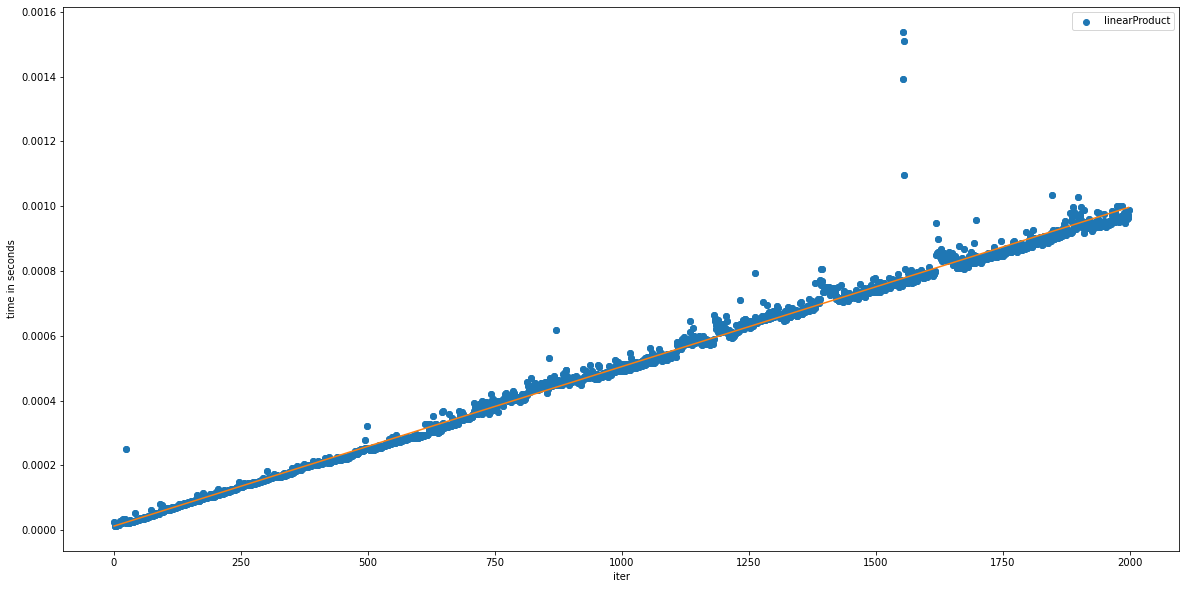

linearProduct
2


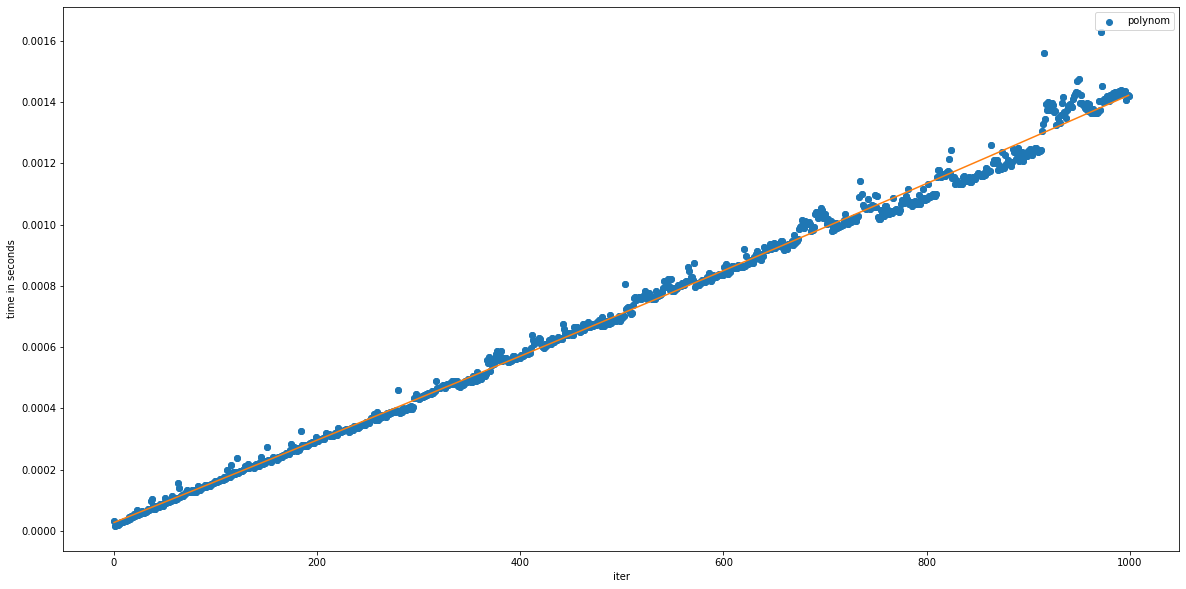

polynom
2


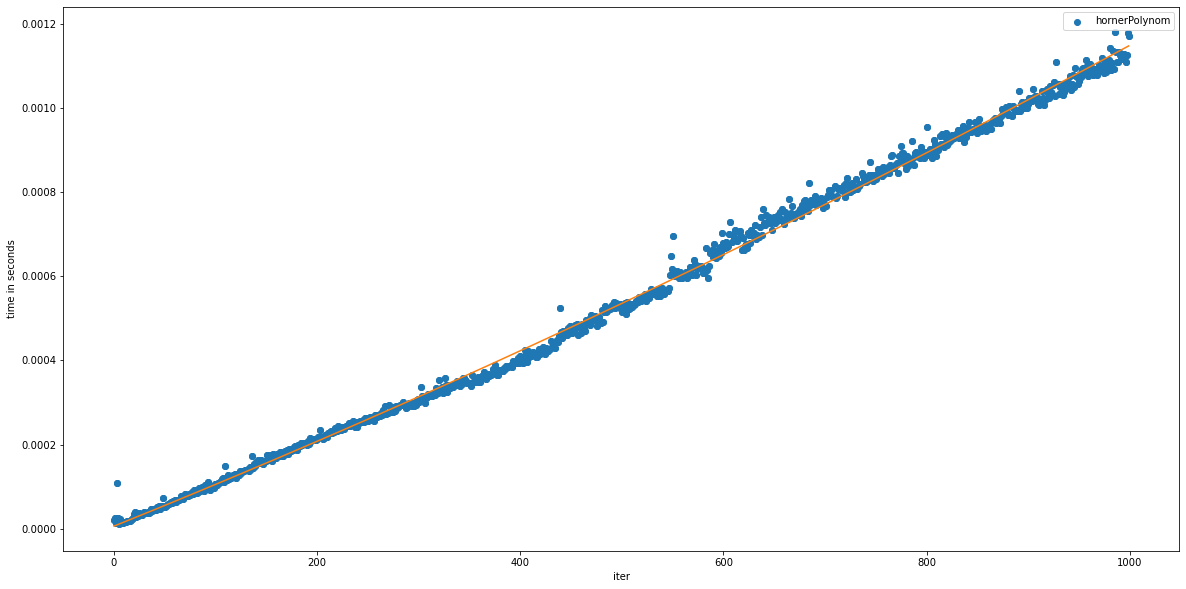

hornerPolynom
2


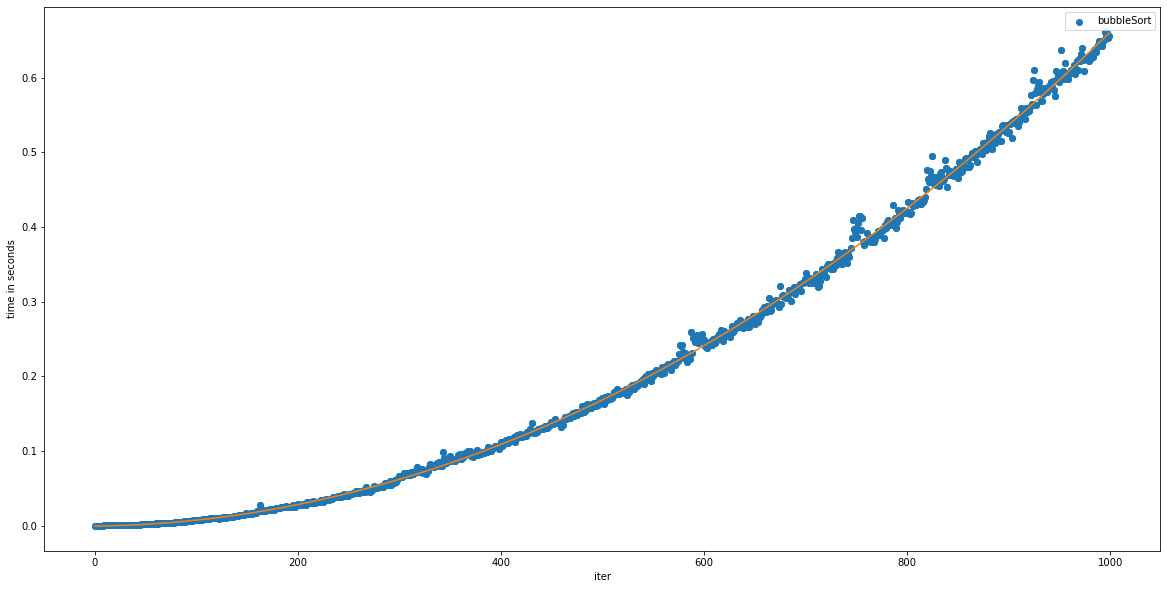

bubbleSort
2


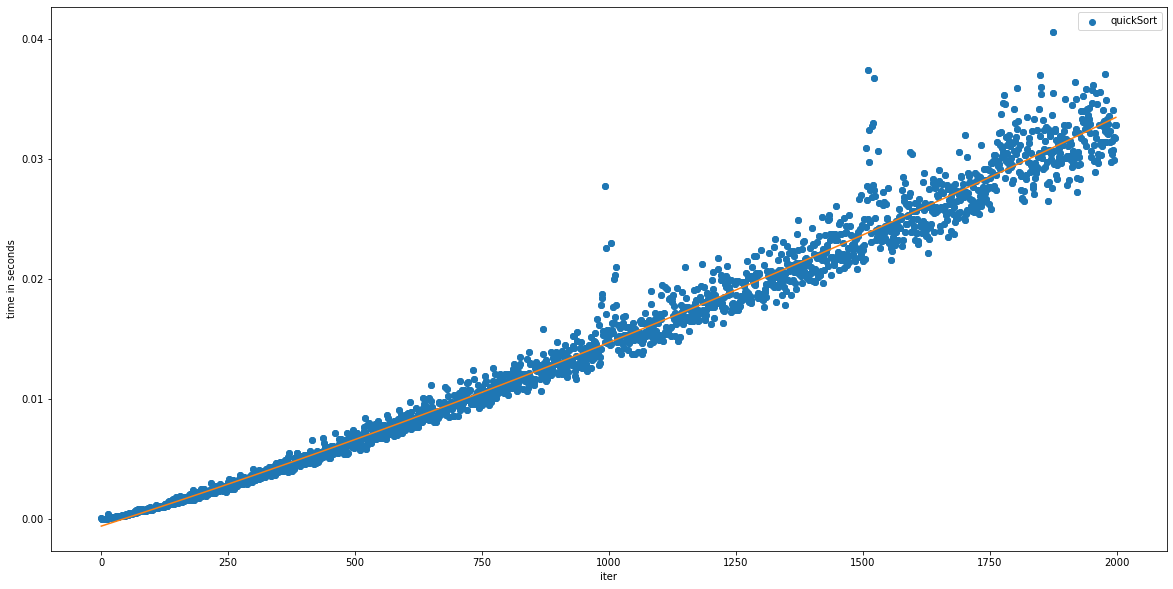

quickSort
1


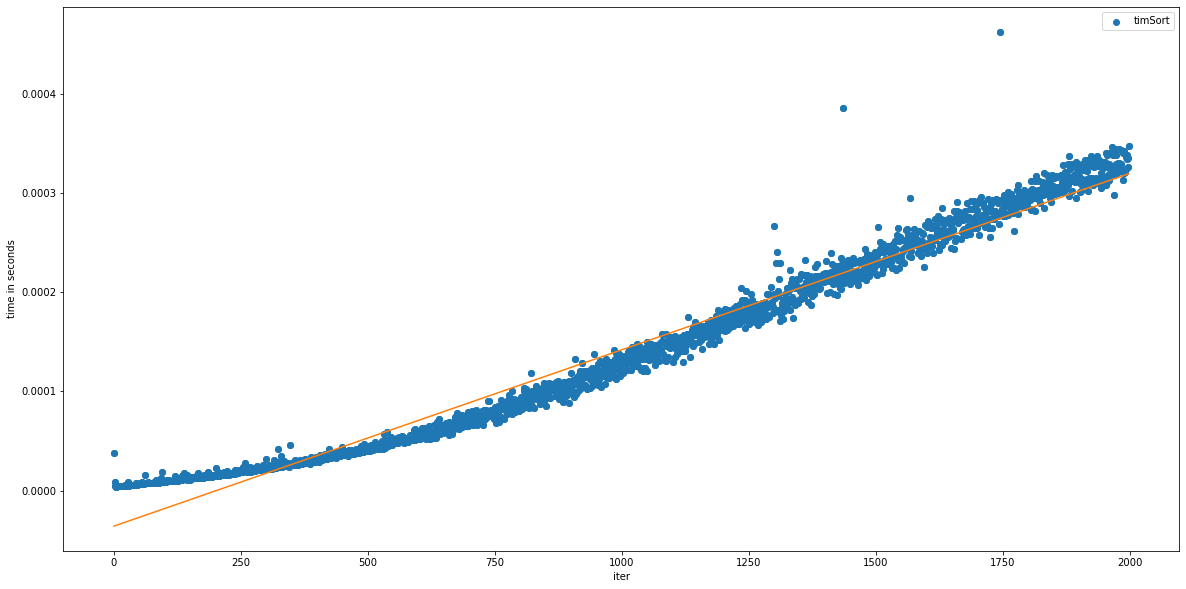

timSort


In [64]:

%matplotlib inline
import matplotlib.pyplot as plt
res = tester(testFunctions, rand_vectors)
resDegree = zip(res, testFunctions)
for algo, (alg, degree) in resDegree:
    print(degree)
    x = list(map(lambda x: x[0], res[algo]))
    y = list(map(lambda x: x[1], res[algo]))
    p = np.poly1d( np.polyfit(x, y, degree) )
    plt.figure(figsize=(20, 10))
    plt.plot(x, y, 'o', x, p(x), '-')
    plt.scatter(x, y, label=algo)
    plt.xlabel('iter')
    plt.ylabel('time in seconds')
    plt.legend()
    plt.savefig(algo + '.png')
    plt.show()
    print(algo)
    

In [65]:
def multiplyMatrix(A,B):
    return [[sum(a * b for a, b in zip(A_row, B_col))
                        for B_col in zip(*B)]
                                for A_row in A]

100%|██████████████████████████████████████████████████████████████████████████████| 499/499 [3:43:32<00:00, 26.88s/it]
No handles with labels found to put in legend.


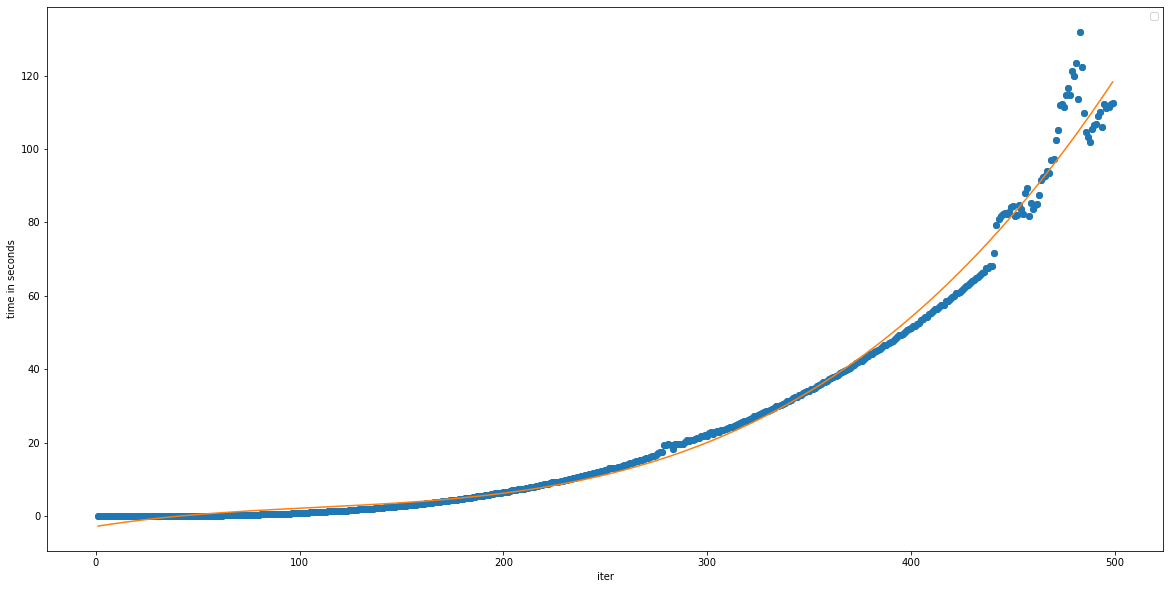

In [67]:
dataForMatrix=[]
for i in tqdm(range(1, 500)):
    A = np.random.rand(i,i)
    B = np.random.rand(i,i)
    start = timer()
    # ....
    # (your code runs here)

    for run in range(0, iters):
        multiplyMatrix(A, B)
    # ...

    end = timer()
    time = end-start
    dataForMatrix.append((i, time))
x = list(map(lambda x: x[0], dataForMatrix))
y = list(map(lambda x: x[1], dataForMatrix))   
p = np.poly1d( np.polyfit(x, y, 3) )
plt.figure(figsize=(20, 10))
plt.plot(x, y, 'o', x, p(x), '-')
plt.xlabel('iter')
plt.ylabel('time in seconds')
plt.scatter(x, y)
plt.legend()
plt.savefig('matrix.png')
plt.show()